# What Would Have Been Your Fate Aboard Titanic?

**Author:** Eloïse Delerue

**Date:** October 6th, 2024

The tragic sinking of the Titanic on April 15th, 1912 caused the death of 1,502 people out of its 2,224 passengers and crew, making the incident one of the deadliest peacetime shipwrecks. If elements of luck were probably involved in surviving, could it be that other factors directly related to these people were also at play?

**Objective: Predict a Titanic passenger's survival based on their data (genre, age, socio-economic class, etc.) using classification algorithms.**

## 1. Library Import And Function Construction

In [221]:
# Computing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [222]:
def plot_sorted_coefficients(coef, figure_number, threshold = 1e-08):
    """
    Plots a sorted scatter plot of logistic regression coefficients with different colors
    for positive, negative, and near-zero coefficients.
    
    Parameters:
    - coef: A pandas Series or array-like object containing coefficients.
    - figure_number: A numero that will appear in the figure title.
    - threshold: A float value used to classify near-zero coefficients. Default is 1e-08.
    """

    # Sort the coefficients by their absolute values
    sorted_coef = coef.abs().sort_values()
    
    # Get the original coefficients for coloring
    original_sorted_coef = coef.loc[sorted_coef.index]
    
    # Create a scatter plot with bars
    plt.figure(figsize=(5, 5))
    
    # Plot positive coefficients in blue, negative coefficients in yellow, and near-zero coefficients in grey
    colors = [
        'grey' if abs(c) < threshold else 'blue' if c > 0 else 'yellow'
        for c in original_sorted_coef
    ]
    
    # Scatter plot for coefficients
    plt.scatter(sorted_coef.values, sorted_coef.index, color = colors, zorder = 5)
    
    # Plot lines from the origin to the scatter points
    for i in range(len(sorted_coef)):
        plt.plot([0, sorted_coef.values[i]], [i, i], color = 'skyblue', lw = 2)
    
    # Add vertical line at zero
    plt.axvline(x = 0, color = 'gray', linestyle = '--', linewidth = 1)
    
    # Set labels and title
    plt.suptitle(f"Figure {figure_number}")
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Logistic Regression Coefficients (Absolute Values)')
    
    # Show the plot
    plt.show()

## 2. Data Import

In [223]:
df = pd.read_csv("titanic.csv")

In [224]:
pd.set_option('display.max_columns', None)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3. Data Description

In [225]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Number of people')

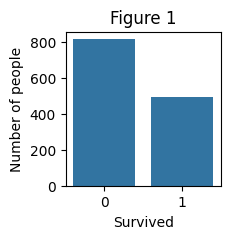

In [226]:
# Predicted variable
survival = df['Survived'].value_counts()
plt.figure(figsize = (2, 2))
plt.title("Figure 1")
sns.barplot(x = survival.index, y = survival.values)
plt.ylabel('Number of people')

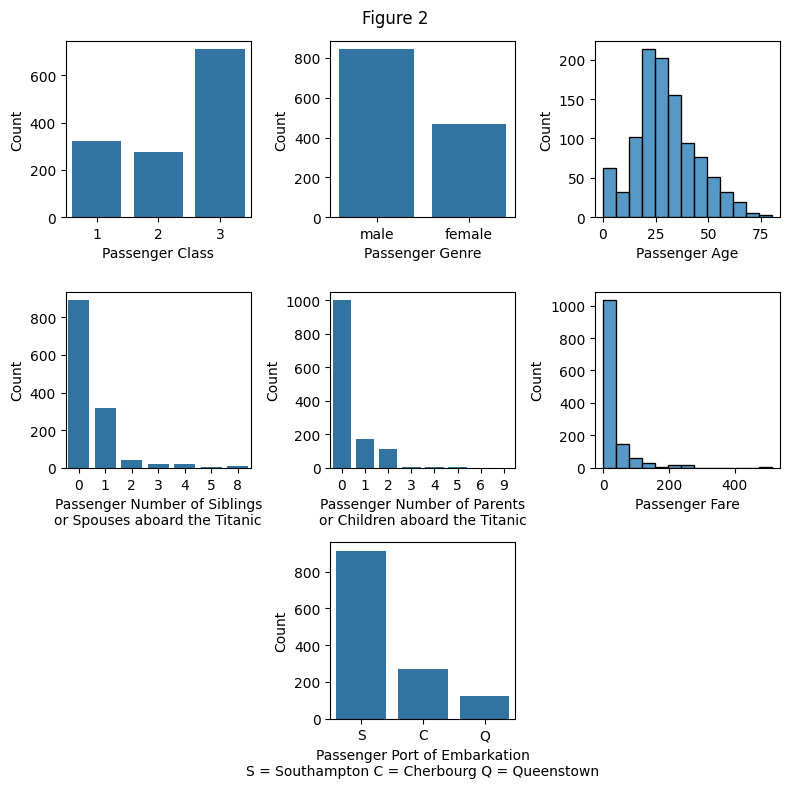

In [227]:
fig2, ax = plt.subplots(3,3)
plt.suptitle("Figure 2")
fig2.set_figheight(8)
fig2.set_figwidth(8)
fig2.tight_layout(w_pad=2, h_pad=5)

sns.countplot(x=df["Pclass"], ax=ax[0][0])
ax[0][0].set(xlabel = 'Passenger Class', ylabel = 'Count')

sns.countplot(x=df["Sex"], ax=ax[0][1])
ax[0][1].set(xlabel = 'Passenger Genre', ylabel = 'Count')

sns.histplot(x=df["Age"], ax=ax[0][2], bins=13)
ax[0][2].set(xlabel = 'Passenger Age', ylabel = 'Count')

sns.countplot(x=df["SibSp"], ax=ax[1][0])
ax[1][0].set(xlabel = "Passenger Number of Siblings\nor Spouses aboard the Titanic", ylabel = 'Count')

sns.countplot(x=df["Parch"], ax=ax[1][1])
ax[1][1].set(xlabel = "Passenger Number of Parents\nor Children aboard the Titanic", ylabel = 'Count')

sns.histplot(x=df["Fare"], ax=ax[1][2], bins=13)
ax[1][2].set(xlabel = "Passenger Fare", ylabel = 'Count')

ax[2][0].set_visible(False)

sns.countplot(x=df["Embarked"], ax=ax[2][1])
ax[2][1].set(xlabel = "Passenger Port of Embarkation\nS = Southampton C = Cherbourg Q = Queenstown", ylabel = 'Count')

ax[2][2].set_visible(False)

plt.tight_layout()

## 4. Data Standardisation

In [228]:
# Separate the target variable from the rest of the dataset
y = df['Survived']

# Binarise data
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# Transform the 'Embarked' column into dummy/boolean columns
df = pd.get_dummies(df, columns = ['Embarked'], drop_first = True)

# Drop the target variable and the unused columns
features = df.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin'])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(features)
X = pd.DataFrame(X, columns = features.columns)

# Merge the data
df = X.copy()
df['Survived'] = y

# Drop the lines with NaN
df = df.dropna(how='any')

C:\Users\elois\AppData\Local\Temp\ipykernel_15252\283708308.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


In [229]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Survived
0,0.841916,-0.743497,-0.547050,0.481288,-0.445000,-0.503402,-0.322040,0.657394,0
1,-1.546098,1.344995,0.563552,0.481288,-0.445000,0.734222,-0.322040,-1.521159,1
2,0.841916,1.344995,-0.269400,-0.479087,-0.445000,-0.490356,-0.322040,0.657394,1
3,-1.546098,1.344995,0.355314,0.481288,-0.445000,0.382778,-0.322040,0.657394,1
4,0.841916,-0.743497,0.355314,-0.479087,-0.445000,-0.487940,-0.322040,0.657394,0
...,...,...,...,...,...,...,...,...,...
1300,0.841916,1.344995,-1.865890,0.481288,0.710763,-0.377288,-0.322040,0.657394,1
1302,-1.546098,1.344995,0.494139,0.481288,-0.445000,1.095975,3.105202,-1.521159,1
1303,0.841916,1.344995,-0.130575,-0.479087,-0.445000,-0.493255,-0.322040,0.657394,1
1305,-1.546098,1.344995,0.632964,-0.479087,-0.445000,1.461271,-0.322040,-1.521159,1


## 5. Train/Test Split

In [230]:
# Splitting the dataset into train and test
X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)

## 6. Data Modelling

### 6.1. Model 1 - Logistic Regression

In [231]:
# Performing Logistic Regression
reg = LogisticRegression(max_iter = 100)
reg.fit(X_train, y_train)

coef = pd.Series(reg.coef_.flatten(), index = X_train.columns)

In [232]:
# Test the logistic regression
y_pred_1 = reg.predict(X_test)

In [233]:
# Confusion matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_df_1 = pd.DataFrame(cm_1, index=['Died', 'Survived'], columns=['Predicted Died', 'Predicted Survived'])
print("Confusion Matrix:")
print(cm_df_1)

Confusion Matrix:
          Predicted Died  Predicted Survived
Died                 117                  16
Survived              23                  53


In [234]:
accuracy_score(y_test, y_pred_1)

0.8133971291866029

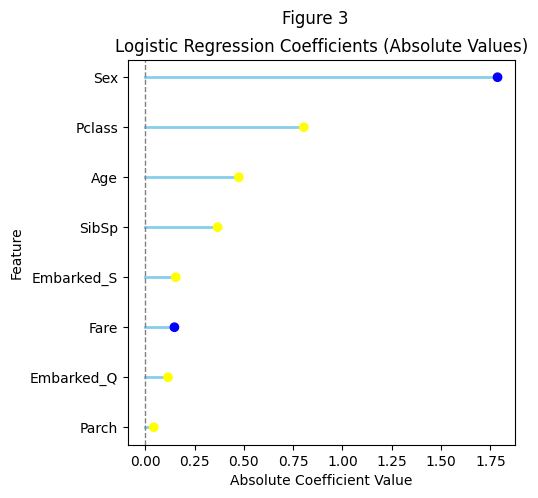

In [235]:
plot_sorted_coefficients(coef,3)

### 6.2. Model 2 - Logistic Regression With L1 Regularisation

In [236]:
# Performing Logistic Regression
reg_l1 = LogisticRegression(C = 0.05, solver = 'saga', penalty = 'l1', max_iter = 100)
reg_l1.fit(X_train, y_train)

coef = pd.Series(reg_l1.coef_.flatten(), index = X_train.columns)

In [237]:
# Test the logistic regression
y_pred_2 = reg_l1.predict(X_test)

In [238]:
# Confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_df_2 = pd.DataFrame(cm_2, index=['Died', 'Survived'], columns=['Predicted Died', 'Predicted Survived'])
print("Confusion Matrix:")
print(cm_df_2)

Confusion Matrix:
          Predicted Died  Predicted Survived
Died                 120                  13
Survived              24                  52


In [239]:
accuracy_score(y_test, y_pred_2)

0.8229665071770335

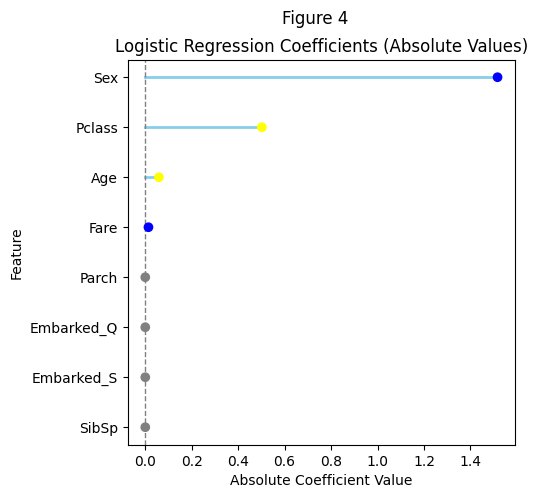

In [240]:
plot_sorted_coefficients(coef,4)

### 6.3. Model 3 - Random Forest

In [241]:
# Construct the random forest
model = RandomForestClassifier(n_estimators = 1000, random_state = 666, max_depth = 8)
model.fit(X_train, y_train)

y_pred_3 = model.predict(X_test)

In [242]:
# Confusion matrix
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_df_3 = pd.DataFrame(cm_3, index=['Died', 'Survived'], columns=['Predicted Died', 'Predicted Survived'])
print("Confusion Matrix:")
print(cm_df_3)

Confusion Matrix:
          Predicted Died  Predicted Survived
Died                 119                  14
Survived              23                  53


In [243]:
accuracy_score(y_test, y_pred_3)

0.8229665071770335

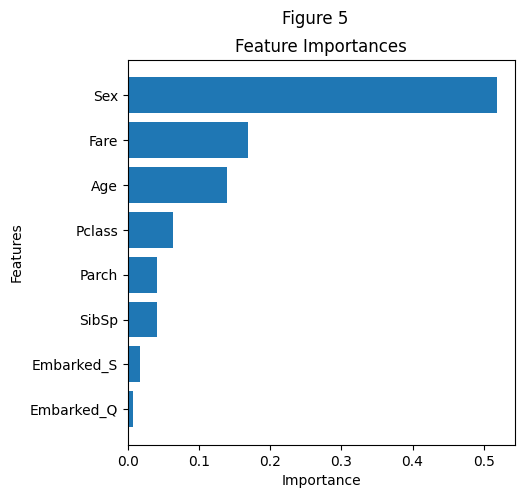

In [244]:
# Plot the feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(5, 5))
plt.suptitle("Figure 5")
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align = "center")
plt.yticks(ticks = range(X_train.shape[1]), labels = [X_train.columns[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

### 6.4. Model 4 - Neural Network

#### 6.4.1. Model 4.1 - Neural Network Without Regularisation

In [245]:
# Neural Network with three hidden layers ([100,50] neurons)
clf_150_neurons = MLPClassifier(hidden_layer_sizes=(100,50), activation = 'relu',
                              solver='adam', max_iter = 100, alpha=0, tol = 1e-2, batch_size= 200,
                              random_state = 666, verbose = True
                              )

# Train the network
clf_150_neurons.fit(X_train, y_train)

# Predict on the test set
y_pred_4_1 = clf_150_neurons.predict(X_test)

Iteration 1, loss = 0.66684833
Iteration 2, loss = 0.59409777
Iteration 3, loss = 0.53953088
Iteration 4, loss = 0.49371936
Iteration 5, loss = 0.45685279
Iteration 6, loss = 0.42631629
Iteration 7, loss = 0.40177658
Iteration 8, loss = 0.38421282
Iteration 9, loss = 0.37176298
Iteration 10, loss = 0.36321724
Iteration 11, loss = 0.35679508
Iteration 12, loss = 0.35271182
Iteration 13, loss = 0.34996700
Iteration 14, loss = 0.34680947
Iteration 15, loss = 0.34474821
Iteration 16, loss = 0.34343640
Iteration 17, loss = 0.34121190
Iteration 18, loss = 0.33922090
Iteration 19, loss = 0.33798040
Iteration 20, loss = 0.33631666
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [246]:
# Confusion matrix
cm_4_1 = confusion_matrix(y_test, y_pred_4_1)
cm_df_4_1 = pd.DataFrame(cm_4_1, index=['Died', 'Survived'], columns=['Predicted Died', 'Predicted Survived'])
print("Confusion Matrix:")
print(cm_df_4_1)

Confusion Matrix:
          Predicted Died  Predicted Survived
Died                 123                  10
Survived              21                  55


In [247]:
accuracy_score(y_test, y_pred_4_1)

0.8516746411483254

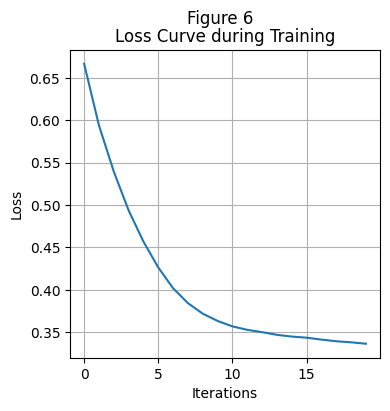

In [248]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.suptitle("Figure 6")
plt.plot(clf_150_neurons.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#### 6.4.2. Model 4.2 - Neural Network With Regularisation

In [249]:
# Neural Network with three hidden layers ([100,50] neurons)
clf_150_neurons_reg = MLPClassifier(hidden_layer_sizes = (100,50), activation = 'relu',
                              solver='adam', max_iter = 100, alpha = 5, tol = 1e-2, batch_size= 200,
                              random_state = 666, verbose = True
                              )

# Train the network
clf_150_neurons_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_4_2 = clf_150_neurons_reg.predict(X_test)

Iteration 1, loss = 1.90193844
Iteration 2, loss = 1.78661402
Iteration 3, loss = 1.69418882
Iteration 4, loss = 1.61121315
Iteration 5, loss = 1.53694088
Iteration 6, loss = 1.46818979
Iteration 7, loss = 1.40449257
Iteration 8, loss = 1.34561192
Iteration 9, loss = 1.29073457
Iteration 10, loss = 1.23902079
Iteration 11, loss = 1.19102335
Iteration 12, loss = 1.14620524
Iteration 13, loss = 1.10396967
Iteration 14, loss = 1.06520868
Iteration 15, loss = 1.02908464
Iteration 16, loss = 0.99501329
Iteration 17, loss = 0.96277778
Iteration 18, loss = 0.93189448
Iteration 19, loss = 0.90350067
Iteration 20, loss = 0.87645946
Iteration 21, loss = 0.85129172
Iteration 22, loss = 0.82740118
Iteration 23, loss = 0.80501966
Iteration 24, loss = 0.78356966
Iteration 25, loss = 0.76328779
Iteration 26, loss = 0.74416477
Iteration 27, loss = 0.72620495
Iteration 28, loss = 0.70970878
Iteration 29, loss = 0.69363849
Iteration 30, loss = 0.67838450
Iteration 31, loss = 0.66395066
Iteration 32, los

In [250]:
# Confusion matrix
cm_4_2 = confusion_matrix(y_test, y_pred_4_2)
cm_df_4_2 = pd.DataFrame(cm_4_2, index=['Died', 'Survived'], columns=['Predicted Died', 'Predicted Survived'])
print("Confusion Matrix:")
print(cm_df_4_2)

Confusion Matrix:
          Predicted Died  Predicted Survived
Died                 118                  15
Survived              23                  53


In [251]:
accuracy_score(y_test, y_pred_4_2)

0.8181818181818182

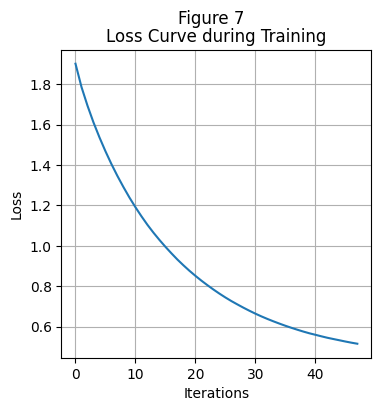

In [252]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.suptitle("Figure 7")
plt.plot(clf_150_neurons_reg.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#### 6.4.3. Model 4.3 - Bigger Neural Network Without Regularisation

In [253]:
# Neural Network with seven hidden layers ([100,100,100,100,100,100,100] neurons)
clf_700_neurons_reg = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100,100,100), activation = 'relu',
                              solver='adam', max_iter = 100, alpha = 0, tol = 1e-2, batch_size= 200,
                              random_state = 666, verbose = True
                              )

# Train the network
clf_700_neurons_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_4_3 = clf_700_neurons_reg.predict(X_test)

Iteration 1, loss = 0.66049209
Iteration 2, loss = 0.59103785
Iteration 3, loss = 0.47477415
Iteration 4, loss = 0.38177651
Iteration 5, loss = 0.37268652
Iteration 6, loss = 0.35882968
Iteration 7, loss = 0.34813167
Iteration 8, loss = 0.33892197
Iteration 9, loss = 0.34021997
Iteration 10, loss = 0.33974874
Iteration 11, loss = 0.32712664
Iteration 12, loss = 0.32890308
Iteration 13, loss = 0.32519224
Iteration 14, loss = 0.32017436
Iteration 15, loss = 0.32145591
Iteration 16, loss = 0.31937717
Iteration 17, loss = 0.31732298
Iteration 18, loss = 0.31642557
Iteration 19, loss = 0.31107373
Iteration 20, loss = 0.31603031
Iteration 21, loss = 0.30698145
Iteration 22, loss = 0.30308134
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [254]:
# Confusion matrix
cm_4_3 = confusion_matrix(y_test, y_pred_4_3)
cm_df_4_3 = pd.DataFrame(cm_4_3, index=['Died', 'Survived'], columns=['Predicted Died', 'Predicted Survived'])
print("Confusion Matrix:")
print(cm_df_4_3)

Confusion Matrix:
          Predicted Died  Predicted Survived
Died                 119                  14
Survived              20                  56


In [255]:
accuracy_score(y_test, y_pred_4_3)

0.8373205741626795

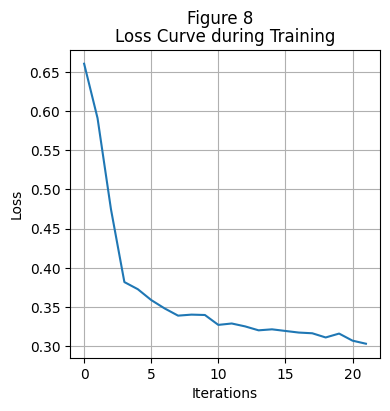

In [256]:
# Plot the loss curve
plt.figure(figsize = (4, 4))
plt.suptitle("Figure 8")
plt.plot(clf_700_neurons_reg.loss_curve_)
plt.title('Loss Curve during Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## 7. Conclusion

The survival of a Titanic passenger can be predicted with an accuracy of 85.1% using a neural network with a 100-neurons layer and a 50-neurons layer, without regularisation. This is better than a logistic regression, without (81.3%) or with L1 regularisation (82.3%), or a random forest (same accuracy than the logistic regression with L1 regularisation). Finally, imposing regularisation (81.8%) or adding layers of neurons (83.7%) to the neural network does not appear to increase accuracy for this given dataset.

## 8. Bonus: Diagnoses

### 8.1. Model 1 - Logistic Regression

In [257]:
# Accuracy for train data
y_train_pred_1 = reg.predict(X_train)
accuracy_score(y_train, y_train_pred_1)

0.8528708133971292

In [258]:
# Accuracy reminder for test data
accuracy_score(y_test, y_pred_1)

0.8133971291866029

It seems that there is a low bias with this model.

### 8.2. Model 2 - Logistic Regression With L1 Regularisation

In [259]:
# Accuracy for train data
y_train_pred_2 = reg_l1.predict(X_train)
accuracy_score(y_train, y_train_pred_2)

0.8564593301435407

In [260]:
# Accuracy reminder for test data
accuracy_score(y_test, y_pred_2)

0.8229665071770335

It seems that the bias is slightly higher than for the logistic regression without regularisation, in spite of the regularisation preventing overfitting.

### 8.3. Model 3 - Random Forest

In [261]:
# Accuracy for train data
y_train_pred_3 = model.predict(X_train)
accuracy_score(y_train, y_train_pred_3)

0.9246411483253588

In [262]:
# Accuracy reminder for test data
accuracy_score(y_test, y_pred_3)

0.8229665071770335

It seems that there is a quite high variance with this model.

### 8.4. Model 4 - Neural Network

Please note that I only diagnose the neural network with a 100-neurons layer and a 50-neurons layer, without regularisation, because it has the best accuracy, and because I had already manually "optimised" it.

In [263]:
# Accuracy for train data
y_train_pred_4_1 = clf_150_neurons.predict(X_train)
accuracy_score(y_train, y_train_pred_4_1)

0.8660287081339713

In [264]:
# Accuracy reminder for test data
accuracy_score(y_test, y_pred_4_1)

0.8516746411483254

It seems that we are in the case of a slight bias.